In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Notes

- **Description des variables**
    * age
    * sex : 0 femeale, 1 male
    * cp : chest pain type (4 values)
    * trestbps : resting blood pressure
    * chol : serum cholestoral in mg/dl
    * fbs : fasting blood sugar > 120 mg/dl
    * restecg : resting electrocardiographic results (values 0,1,2)
    * thalach : maximum heart rate achieved
    * exang : exercise induced angina
    * oldpeak = ST depression induced by exercise relative to rest : La variable est une dérivée qui en temps normal doit être de zéro. Il serait intéressant de regarder s'il y a une corrélation entre cette variable et la target
    * slope : the slope of the peak exercise ST segment
    * ca : number of major vessels (0-3) colored by flourosopy
    * thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
    * target : si la personne a une maladie cardiaque ou non
    

- **Relation Variables / Target**
    * target / continue : Les variables col / talach & oldpeak semblent être liées à la présence d'une maladie cardiaque -> hypothèse à vérifier
    * target / discrete : 
        * Hypothèses à tester :
            * cp 0 - pas de trouble cardiaque ? 
            * restecg 1 - trouble cardiaque ? 
            * exang 0 - trouble cardiaque ? 
            * ca 0 - trouble cardiaque ? 
            * thal 2 - trouble cardiaque ? 

### Import dataset

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

## Etude des variables

In [ ]:
for col in df:
    print(f'{col :-<50}{len(df[col].unique())}')

In [ ]:
df[df['ca']  == 4]

### Création des variables discrètes et continues

In [19]:
continuous_variables = list()
discrete_variables = list ()

for col in df:
    if len(df[col].unique()) > 10 and col != 'age':
        continuous_variables.append(col)
    else:
        discrete_variables.append(col)

print(continuous_variables)
print(discrete_variables)

['trestbps', 'chol', 'thalach', 'oldpeak']
['age', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


### Histogrames des variables continues

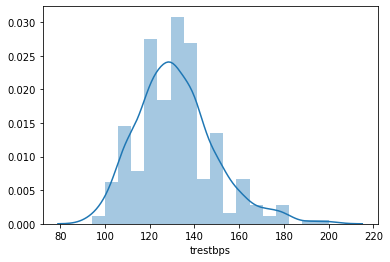

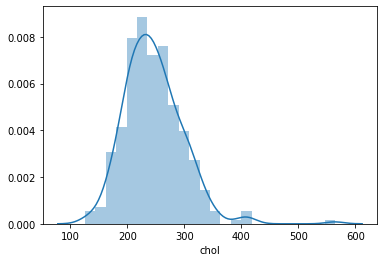

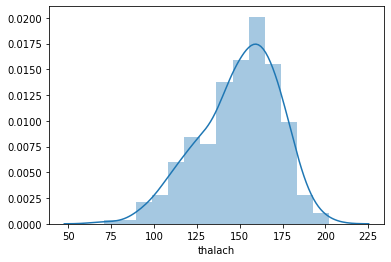

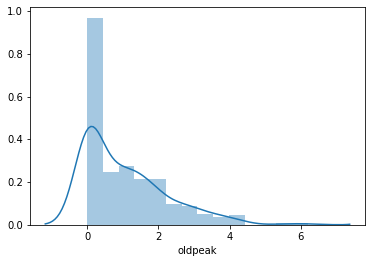

In [20]:
for col in continuous_variables:
    plt.figure()
    sns.distplot(df[col])

### Variables Qualitatives

In [36]:
for col in discrete_variables:
#     plt.figure()
    print(f'{col :-<20}{df[col].unique()}')
#     plt.legend()

age-----------------[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex-----------------[1 0]
cp------------------[3 2 1 0]
fbs-----------------[1 0]
restecg-------------[0 1 2]
exang---------------[0 1]
slope---------------[0 2 1]
ca------------------[0 2 1 3 4]
thal----------------[1 2 3 0]
target--------------[1 0]


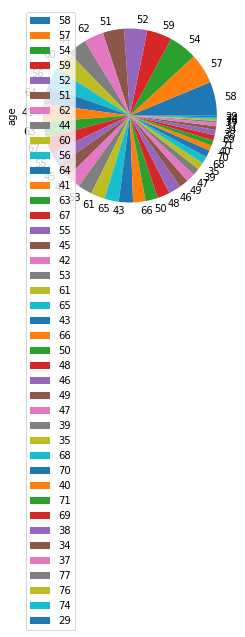

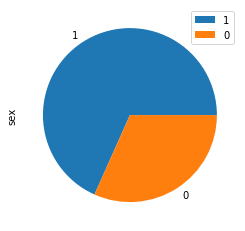

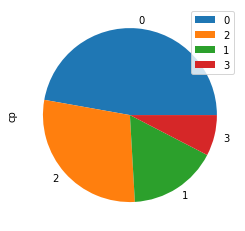

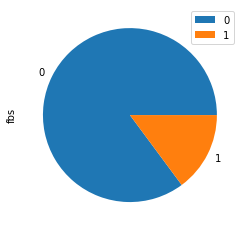

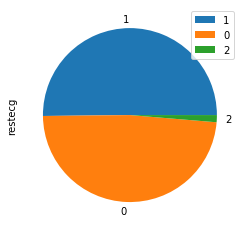

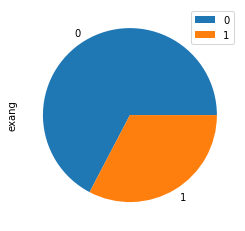

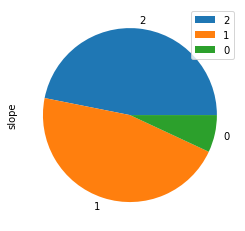

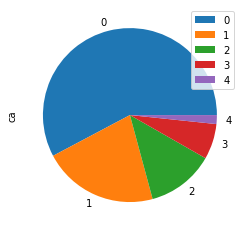

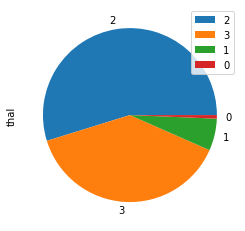

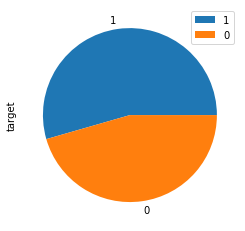

In [37]:
for col in discrete_variables:
    plt.figure()
    df[col].value_counts().plot.pie()
    plt.legend()

## Relation Target / variable

### Création sous ensemble positif / négatif

In [22]:
df_positive = df[df['target'] == 1 ]
df_negative = df[df['target'] == 0 ]

### Target et continuous variables

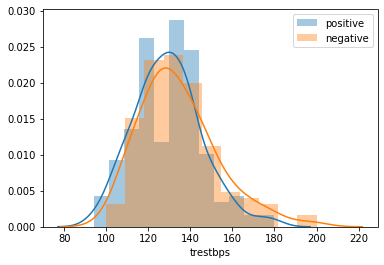

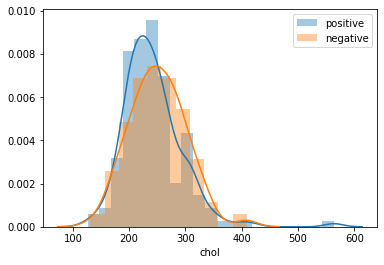

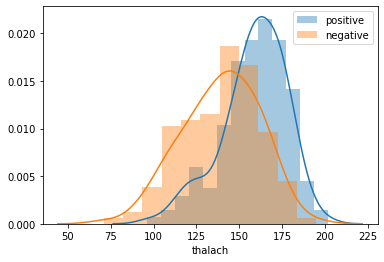

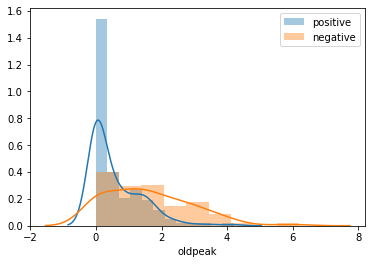

In [38]:
for col in continuous_variables:
    plt.figure()
    sns.distplot(df_positive[col], label="positive")
    sns.distplot(df_negative[col], label="negative")
    plt.legend()

### Relation Target / Age

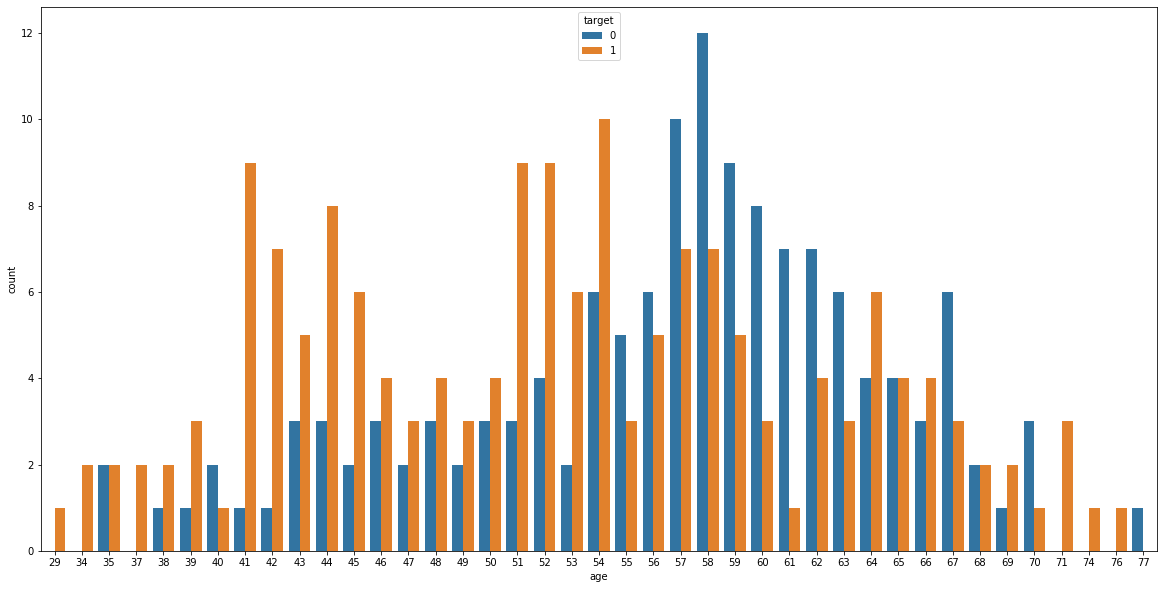

In [41]:
plt.figure(figsize=(20,10))
sns.countplot(x='age', hue='target', data=df)

### Relation Target / Discrete

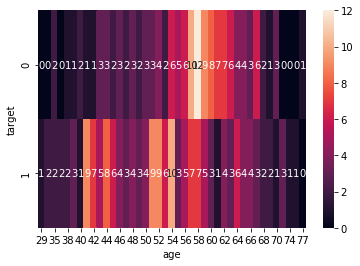

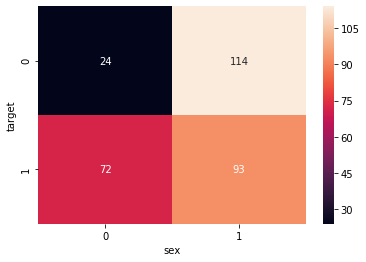

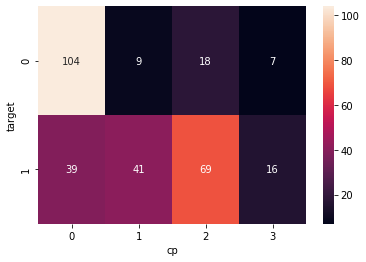

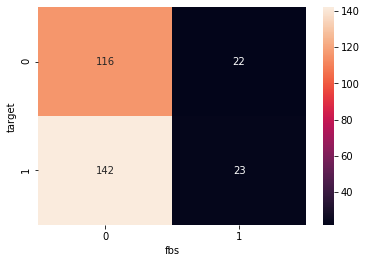

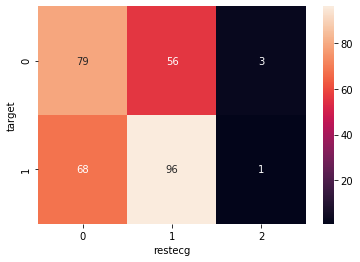

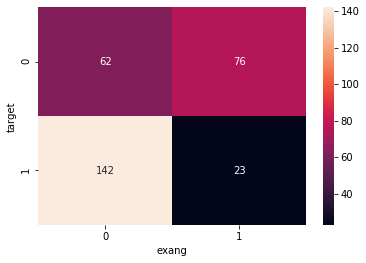

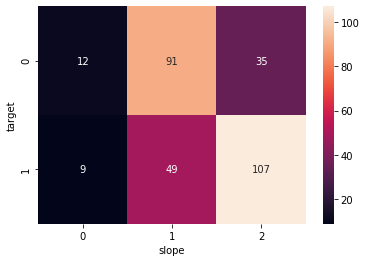

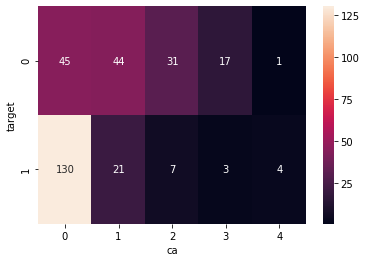

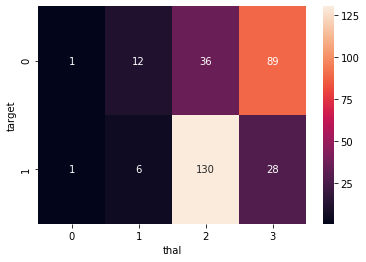

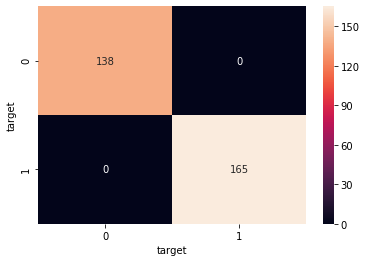

In [42]:
for col in discrete_variables:
    plt.figure()
    sns.heatmap(pd.crosstab(df['target'], df[col]), annot=True, fmt='d')